In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#loading the data
data = pd.read_csv("../Hackethon/LoanPrediction/LReg/train.csv")
data.head(3)

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0


In [5]:
#remove NAN's 
data.LoanAmount = np.log((data.LoanAmount.fillna(data.LoanAmount.mean())+1))
data.ApplicantIncome =np.log( (data.ApplicantIncome.fillna(data.ApplicantIncome.mean())+1))
data.head(3)
data.isnull().sum()

ApplicantIncome    0
LoanAmount         0
dtype: int64

In [6]:
#plotting the data

var_X =data.iloc[:,0:1]
var_Y = pd.DataFrame(data.LoanAmount)

In [7]:
var_X.head(2)

,ApplicantIncome
0,2.269462
1,2.243931


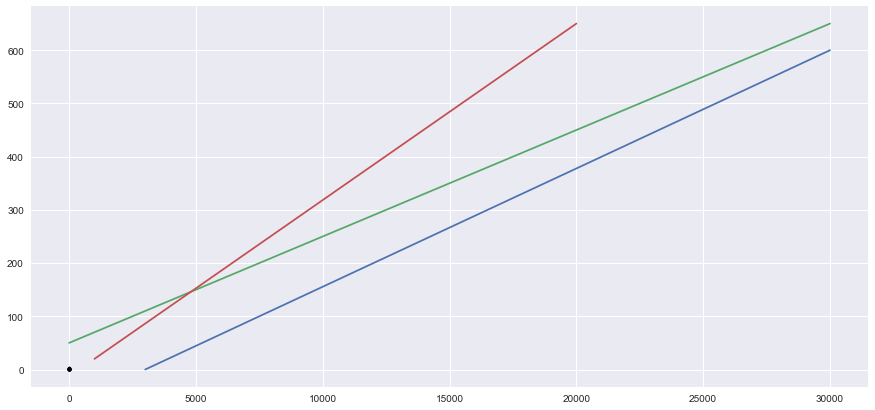

In [8]:
plt.figure(figsize=(15,7))
plt.plot(var_X["ApplicantIncome"],var_Y["LoanAmount"],'k.')
plt.plot([3000,30000],[0,600],'-')
plt.plot([0,30000],[50,650],'-')
plt.plot([1000,20000],[20,650],'-')


In [101]:
#which one is better
# It can be find using the optimized value of B0 and B1
# which will minimize the cost function
#we will use the gradient descent


In [9]:
#number of times we will perform the grdient descent to acquire the optimal values(minima)
iterations=15
# learning rate at which GD will converge
alpha =0.01


In [10]:
#since we don't have intercept in the data frame and we need it to calculate value of B0, adding acolumn of 1's in Xdf
var_X['intercept']=1
#convert to numpy array for easy matrix math 
# setting the values of B to 0 as we don't know these initially
X = np.array(var_X)
Y = np.array(var_Y).flatten()
beta = np.array([0,0])

In [11]:
# z= np.array([[2],[2]])
beta.shape

(2L,)

In [12]:
# Create the cost function. this function will give the cost of using particular values of Beta(B0 and B1)
def costfunction(x,y,beta):
    m= len(y)
# here we are performing the matrix multiplication of X values with beta(0) values. Dot function does the matrix multiplication
    J = np.sum((x.dot(beta)-y)**2)/(2*m)
    
    return J

In [13]:
#matirx multiplication can only be performed if inner dimesions of both array match
# e.g a[3,2]  b[2,4]
#can't do for a[3,3] b[4,2]
# inner dimensions means column for a and row for b
#use shape to get dimensions of an array
X.shape

(25L, 2L)

In [15]:
cost = costfunction(X,Y,beta)
cost

1.5444202096839399

In [170]:
# now we can calculate our optimal beta using gradiet descend
#first we will calculate the graident, which is the differential of cost function
#after the diffrential, the power will go away, we need to substract the y values from the obtained values
# then we will muliply it with learning rate and add to beta values to update these.
# then we will repeat the process

In [171]:
3def gredientDescent(x,y,beta,alpha,iterations):
    m =len(y)
    cost_history = [0] * iterations
    for iteration in range(iterations):
        hypothesis = x.dot(beta)
        loss = (hypothesis-y)
        gradient = x.T.dot(loss)/m
        beta = beta - alpha*gradient
        cost=costfunction(x,y,beta)
        cost_history[iteration]=cost
    return beta,cost_history

In [172]:
(B,c) =gredientDescent(X,Y,beta,alpha,iterations)

In [173]:
B

array([ 0.57639264,  0.06892096])

In [174]:
#prediction 
f = np.log(2600)
print f

7.86326672401


In [175]:
print ( np.array([7.863266,1]).dot(B))

4.60124961053


In [176]:
print np.exp(np.array([7.863266,1]).dot(B))

99.6087099969


In [181]:
c

[1.2237196017045322,
 0.20375261619693547,
 0.10425985981515856,
 0.094554486718279498,
 0.093607397082947047,
 0.093514631612036006,
 0.093505200960892251,
 0.093503899204581659,
 0.093503390403657641,
 0.093502958976100337,
 0.093502535120674135,
 0.093502112028636702,
 0.09350168903582981,
 0.093501266077466644,
 0.093500843147226065]

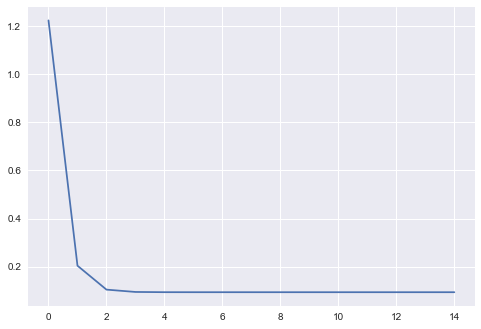

In [182]:
#plot of gradient descent convergence to find minimum cost function
plt.plot(c)

In [159]:
dc = pd.DataFrame(c,columns=["cost"])

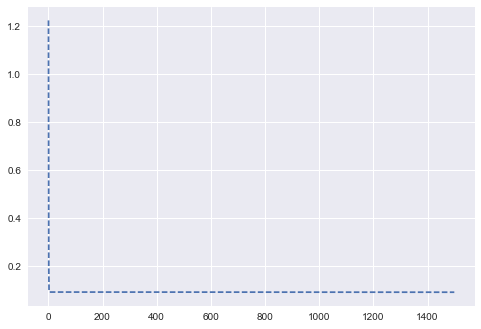

In [163]:
plt.plot(dc.cost,"--")

In [ ]:
# afew tips for good Gradient descent
#use small alpha , try values like 0.1,0.01,0.001,0.0001

#perform feature scaling so that all features come to matching range

#see the graph of costs to verify if GD is working or not